# SALARY PROJECT

Problem Statement- Predict the salary if the employee using the features provided in the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [8]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [9]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [10]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [11]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
301,Prof,A,27,16,Male,127100


In [14]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

ABOUT THE COLUMNS

1.RANK- This columns tells the rank of an individual.

2.DISCIPLINE- This shows the discipline of an individual towards his/her work.

3.YRS.SINCE.PHD- This shows how many years have been passed after his/her phd.

4.YRS.SERVICE- This shows the years of service of an individual or the experience of an individual.

5.SEX- This column tells about the gender.

6.SALARY- This is the target variable.

# CHECKING FOR NULL VALUES IN THE DATA.

In [15]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [16]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Since there is no null value in the table so, no imputation of null values will be done. we'll simply start with the analysis of the data.

In [18]:
df['salary']=df['salary'].astype(float)

In [19]:
df.salary.dtype

dtype('float64')

As salary is my target variable so I'm changing it's data type from int to float.

# Visualization of data

In [20]:
import seaborn as sns

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


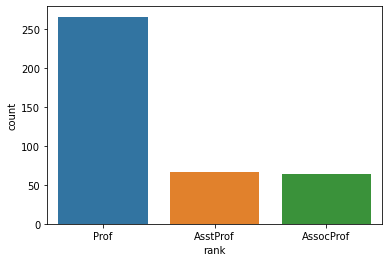

In [23]:
sns.countplot(x='rank',data=df)
print(df['rank'].value_counts())

B    216
A    181
Name: discipline, dtype: int64


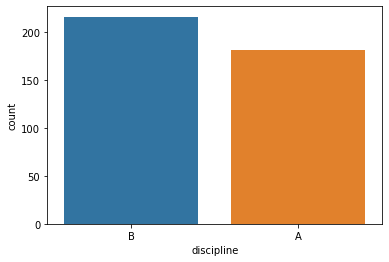

In [30]:
sns.countplot(x='discipline',data=df)
print(df['discipline'].value_counts())

4     19
28    16
8     14
19    13
20    13
13    12
12    12
17    12
21    11
23    11
38    11
10    10
39    10
31    10
11    10
14     9
25     9
15     9
22     9
9      9
30     9
3      8
27     8
37     8
29     8
35     8
33     8
16     8
18     8
40     7
32     6
45     6
26     6
24     6
6      6
7      6
5      6
2      5
43     5
36     5
1      4
41     4
42     4
49     4
46     4
34     3
56     2
52     1
51     1
54     1
47     1
48     1
44     1
Name: yrs.since.phd, dtype: int64


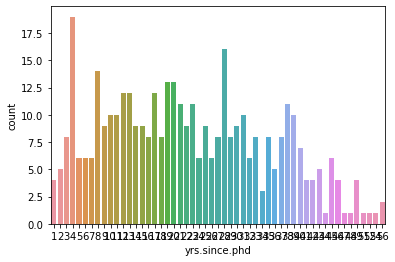

In [40]:
sns.countplot(x='yrs.since.phd',data=df)
print(df['yrs.since.phd'].value_counts())

3     22
19    19
7     18
8     18
23    16
18    15
9     15
2     15
11    14
4     13
1     13
27    11
0     11
6     11
10    11
31    10
20    10
15     9
30     9
28     9
14     8
5      8
16     8
22     8
25     8
38     8
26     7
36     6
17     6
21     6
12     5
35     5
40     5
33     4
37     4
45     4
43     4
39     4
44     3
49     3
24     2
34     2
53     1
57     1
32     1
29     1
41     1
48     1
46     1
51     1
13     1
60     1
Name: yrs.service, dtype: int64


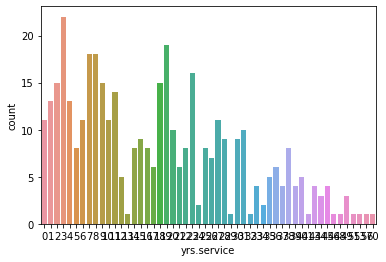

In [41]:
sns.countplot(x='yrs.service',data=df)
print(df['yrs.service'].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


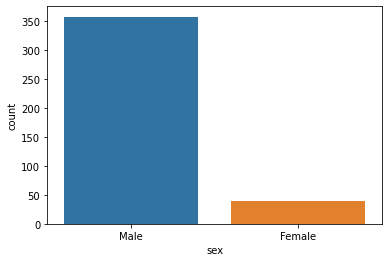

In [32]:
sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

# Checking the distribution of continuous value of the float data type columns.

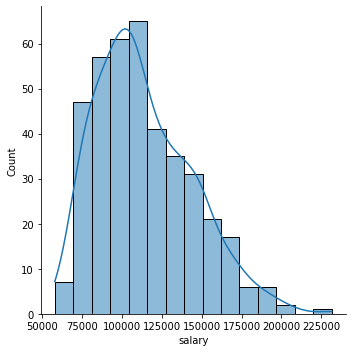

In [42]:
sns.displot(df['salary'],kde=True)

# Encoding the data

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
en=OrdinalEncoder()

In [46]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

In [47]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750.0
1,2.0,1.0,20,16,1.0,173200.0
2,1.0,1.0,4,3,1.0,79750.0
3,2.0,1.0,45,39,1.0,115000.0
4,2.0,1.0,40,41,1.0,141500.0
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106.0
393,2.0,0.0,31,19,1.0,150564.0
394,2.0,0.0,42,25,1.0,101738.0
395,2.0,0.0,25,15,1.0,95329.0


# Describing The Data

In [48]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

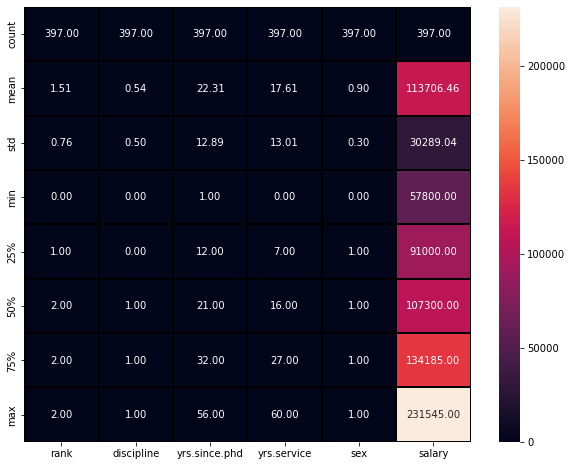

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.describe(),annot=True,linewidths=2,linecolor='Black',fmt='.2f')

# Checking correlation of columns with the target variable.

In [51]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

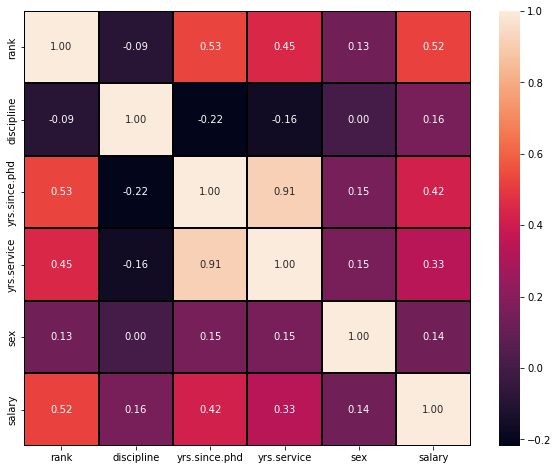

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='Black',fmt='0.2f')

# checking the columns which are positively and negatively correlated to the target variable.

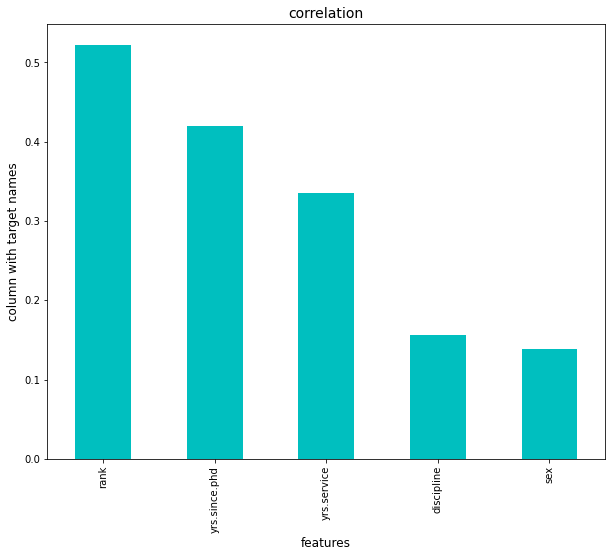

In [57]:
plt.figure(figsize=(10,8))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('features',fontsize=12)
plt.ylabel('column with target names',fontsize=12)
plt.title('correlation',fontsize=14)
plt.show()

as we can see that all the columns are positively correlated to the target variable.

# checking the skewness 

In [59]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

keeping -/+0.5 as the range of skewness. 
Here are the columns that are not in range.

rank is categorical data we won't touch it too,   salary is continuous and is target variable we'll ignore it,  so we are left with yrs.service and yrs.since.phd

# checking outliers

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
collist=df.columns.values
ncol=30
nrow=14

In [63]:
collist

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

In [65]:
for i in range(0,len(collist)):
    print(collist[i])
    break

rank


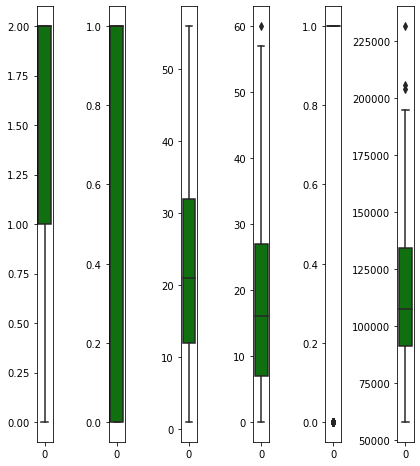

In [66]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data = df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Removing Outliers

In [76]:
df.shape

(397, 6)

In [77]:
from scipy.stats import zscore

In [78]:
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [79]:
df_new=df[(z<3).all(axis=1)]

In [80]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750.0
1,2.0,1.0,20,16,1.0,173200.0
2,1.0,1.0,4,3,1.0,79750.0
3,2.0,1.0,45,39,1.0,115000.0
4,2.0,1.0,40,41,1.0,141500.0
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106.0
393,2.0,0.0,31,19,1.0,150564.0
394,2.0,0.0,42,25,1.0,101738.0
395,2.0,0.0,25,15,1.0,95329.0


In [81]:
df_new.shape

(354, 6)

In [82]:
data_loss=((397-354)/397)*100

In [83]:
data_loss

10.831234256926953

This is the percentage of data lost

we will not be using df_new to build our model as outliers are present in the target column and we do not do anything in target column

# seperating features and the target variable

In [93]:
fea=df.drop('salary',axis=1)
target=df['salary']

# scaling the data using min max scaler

In [99]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
for i in range(0,100):
    fea_train,fea_test,target_train,target_test=train_test_split(fea,target,test_size=0.2,random_state=i)
    lr.fit(fea_train,target_train)
    pre_train=lr.predict(fea_train)
    pre_test=lr.predict(fea_test)
    print(f"at random state {i},the train accuracy is:- {r2_score(target_train,pre_train)}")
    print(f"at random state {i},the testing accuracy is:- {r2_score(target_test,pre_test)}")
    print('\n')

at random state 0,the train accuracy is:- 0.36119999548530757
at random state 0,the testing accuracy is:- 0.40792583149752315


at random state 1,the train accuracy is:- 0.3604245854198438
at random state 1,the testing accuracy is:- 0.4163364187662949


at random state 2,the train accuracy is:- 0.37547390964955596
at random state 2,the testing accuracy is:- 0.36001895545266915


at random state 3,the train accuracy is:- 0.3847313825130594
at random state 3,the testing accuracy is:- 0.329352987501086


at random state 4,the train accuracy is:- 0.38517450334380454
at random state 4,the testing accuracy is:- 0.30440081333156155


at random state 5,the train accuracy is:- 0.3950033630150771
at random state 5,the testing accuracy is:- 0.2752907752774736


at random state 6,the train accuracy is:- 0.3650308031752798
at random state 6,the testing accuracy is:- 0.4018987080607571


at random state 7,the train accuracy is:- 0.3575963886324032
at random state 7,the testing accuracy is:- 0.436031

In [114]:
fea_train,fea_test,target_train,target_test=train_test_split(fea,target,test_size=0.2,random_state=80)

In [115]:
lr.fit(fea_train,target_train)

LinearRegression()

test accuracy

In [116]:
pre_test=lr.predict(fea_test)

In [117]:
 print(r2_score(target_test,pre_test))

0.5086207408821506


train accuracy

In [118]:
 pre_train=lr.predict(fea_train)

In [119]:
print(r2_score(target_train,pre_train))

0.34891747740210666


In [123]:
train_accuracy=r2_score(target_train,pre_train)
testing_accuracy=r2_score(target_test,pre_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,fea,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for testing is {testing_accuracy}")
    print('\n')

at cross fold 2 the cv score is 0.32708011674065085 and accuracy score for training is 0.34891747740210666 and accuracy score for testing is 0.5086207408821506


at cross fold 3 the cv score is 0.32033286730598814 and accuracy score for training is 0.34891747740210666 and accuracy score for testing is 0.5086207408821506


at cross fold 4 the cv score is 0.32181966937683604 and accuracy score for training is 0.34891747740210666 and accuracy score for testing is 0.5086207408821506


at cross fold 5 the cv score is 0.29569928663871764 and accuracy score for training is 0.34891747740210666 and accuracy score for testing is 0.5086207408821506


at cross fold 6 the cv score is 0.33096341839295573 and accuracy score for training is 0.34891747740210666 and accuracy score for testing is 0.5086207408821506


at cross fold 7 the cv score is 0.3257704419996536 and accuracy score for training is 0.34891747740210666 and accuracy score for testing is 0.5086207408821506


at cross fold 8 the cv score 

since the number of fold don't have such impact on accuracy and cv score so cv=6 is selected.

we have to handle the problem of overfitting and underfitting by checking training and testing score.

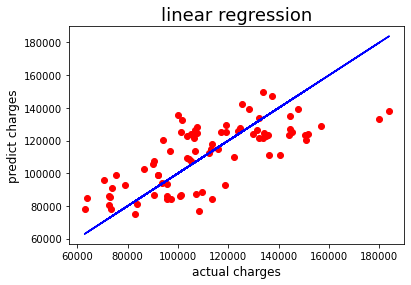

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(x=target_test, y=pre_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('actual charges',fontsize=12)
plt.ylabel('predict charges',fontsize=12)
plt.title('linear regression',fontsize=18)
plt.savefig('lr.png')
plt.show()



In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [139]:
from sklearn.linear_model import Lasso
parameters ={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(fea_train,target_train)
print(clf.best_params_)


{'alpha': 10, 'random_state': 0}


# final model training

In [140]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(fea_train,target_train)
ls_score_training=ls.score(fea_train,target_train)
pred_ls=ls.predict(fea_test)
ls_score_training*100

34.89174595002764

In [144]:
pred_ls=ls.predict(fea_test)

In [146]:
lss=r2_score(target_test,pred_ls)
lss*100

50.86013415515278

In [147]:
cv_score=cross_val_score(ls,fea,target,cv=6)
cv_mean=cv_score.mean()
cv_mean*100

33.096312716799694

# ensemble technique

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(fea_train,target_train)

print(clf.best_params_)
    

{'criterion': 'mae', 'max_features': 'sqrt'}


In [158]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(fea_train,target_train)
rf.score(fea_train,target_train)
prediction_decision=rf.predict(fea_test)

rfs=r2(target_test,prediction_decision)
print('r2_score is'rfs*100)

rfscore=cross_val_score(rf,feature,target,cv=6)
rfc=rfscore.mean()
print('cross val score'rfc*100)

SyntaxError: invalid syntax (Temp/ipykernel_33436/3528679050.py, line 7)

In [159]:
import pickle
filename='salary.pkl'
pickle.dump(rf,open(filename,'wb'))


In [160]:
l_model=pickle.load(open('salary.pkl','rb'))
result=l_model.score(fea_test,target_test)
print(result*100)


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.